In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#img = Image.open(r'D:\Tommy\++AI\himawari9\SAT\SAT13_20240828184000_4_13_6.png') 
img = Image.open(r'D:\Tommy\++AI\himawari9\SAT\SAT13_20240828184000_4_12_6.png') 

In [51]:
# PIL images into NumPy arrays
np_img = np.array(img)
np_img.shape

(256, 256, 4)

In [52]:
gray_img = np_img[:,:,0]

### Color Map

In [12]:
from matplotlib import pyplot as plt, cm
cmap = cm.get_cmap('gray')
cmap.set_under('red')

C:\Users\wangt\AppData\Local\Temp\ipykernel_105168\390340482.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gray')


In [18]:
from matplotlib import pyplot as plt, cm
cmap = cm.get_cmap('Reds')
cmap.set_under('white')

C:\Users\wangt\AppData\Local\Temp\ipykernel_105168\3206867750.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


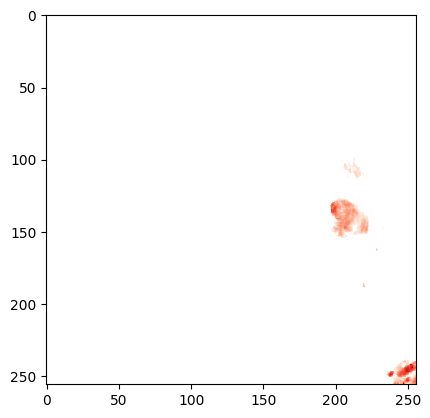

In [21]:
plt.imshow(gray_img, cmap=cmap,vmin=200)

### Mask

In [22]:
gray_img.shape

(256, 256)

In [24]:
rgb_image = np_img[:,:,:3]

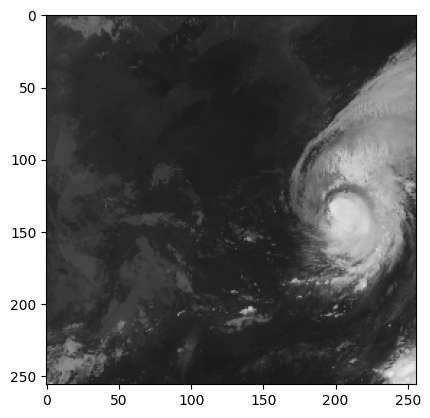

In [25]:
plt.imshow(rgb_image)

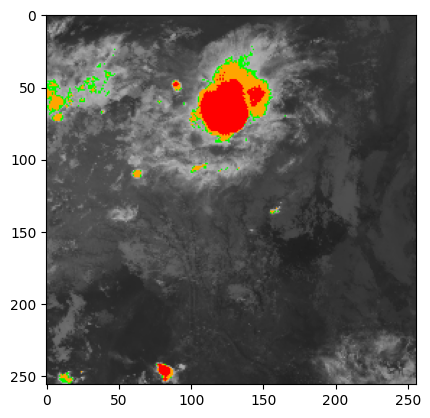

In [53]:
rgb_image = np_img[:,:,:3].copy()
rgb_image[np_img[:,:,0] > 180] = [0,255,0]
rgb_image[np_img[:,:,0] > 190] = [255,165,0]
rgb_image[np_img[:,:,0] > 210] = [255, 0, 0]
plt.imshow(rgb_image)

### Demo-1
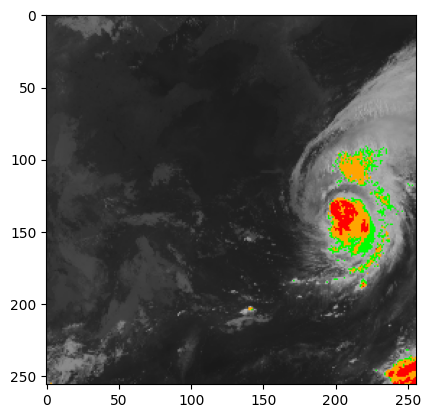
- URL: https://rammb-slider.cira.colostate.edu/?sat=himawari&sec=full_disk&x=4628&y=4028&z=3&angle=0&im=12&ts=1&st=0&et=0&speed=130&motion=loop&maps%5Bborders%5D=white&p%5B0%5D=band_13&opacity%5B0%5D=1&pause=20240828185000&slider=-1&hide_controls=0&mouse_draw=0&follow_feature=0&follow_hide=0&s=rammb-slider&draw_color=FFD700&draw_width=6
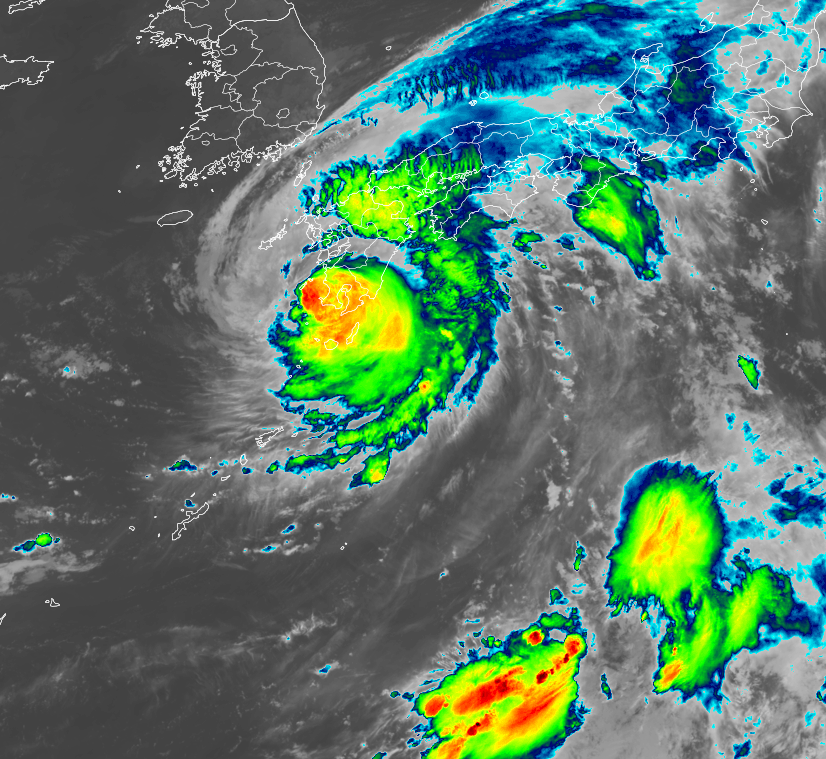

### Demo-2
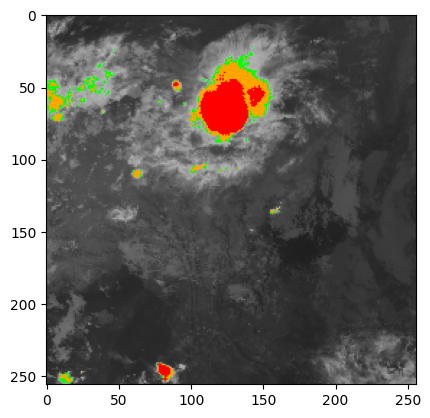
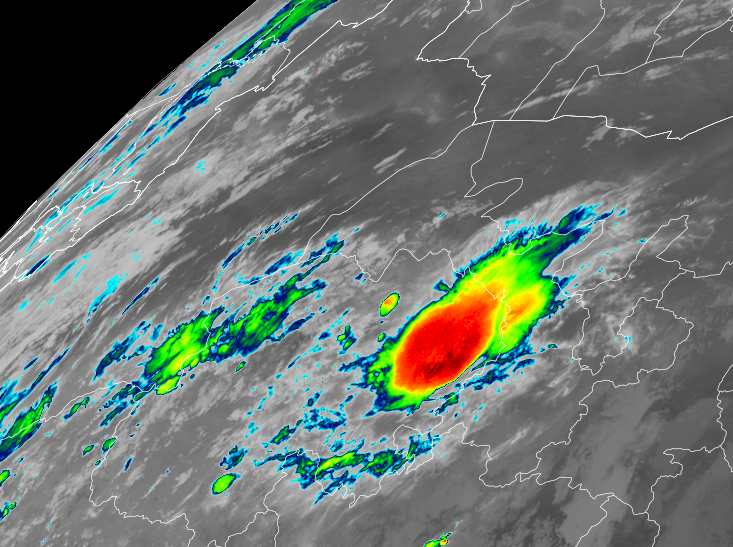

### Convert Pixels in tile to lat/lon
- #### 12_6
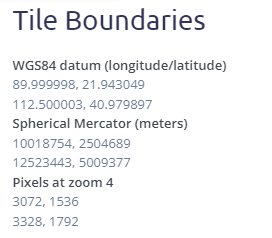

- #### 13_6
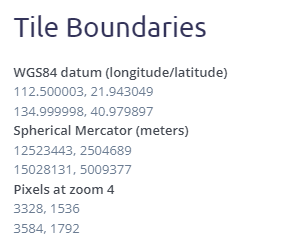


In [54]:
import numpy as np

# Tile 13_6 Boundaries in Spherical Mercator (meters)
left_m = 12523443
right_m = 15028131
top_m = 5009377
bottom_m = 2504689

# Tile size in pixels
tile_width = 256
tile_height = 256

In [55]:
# Resolution (meters per pixel)
resolution_x = (right_m - left_m) / tile_width
resolution_y = (top_m - bottom_m) / tile_height

In [56]:
# Convert pixel (px, py) to meters (mx, my)
def pixel_to_meters(px, py):
    mx = left_m + px * resolution_x
    my = bottom_m + py * resolution_y
    return mx, my

# Convert meters (mx, my) to lat/lon
def meters_to_latlon(mx, my):
    lon = (mx / 6378137.0) * (180.0 / np.pi)
    lat = (np.arctan(np.exp(my / 6378137.0)) * 2.0 - np.pi / 2.0) * (180.0 / np.pi)
    return lat, lon

In [58]:
# Example: Convert pixel (128, 128) to lat/lon
#px, py = 128, 128
px, py = 197, 133
mx, my = pixel_to_meters(px, py)
lat, lon = meters_to_latlon(mx, my)

print(f"Pixel ({px}, {py}) -> Meters ({mx}, {my}) -> Lat/Lon ({lat}, {lon})")

Pixel (197, 133) -> Meters (14450878.6875, 3805952.6875) -> Lat/Lon (32.324276918260985, 129.814451939383)


- Pixel (197, 133) -> Meters (14450878.6875, 3805952.6875) -> Lat/Lon (32.324276918260985, 129.814451939383)
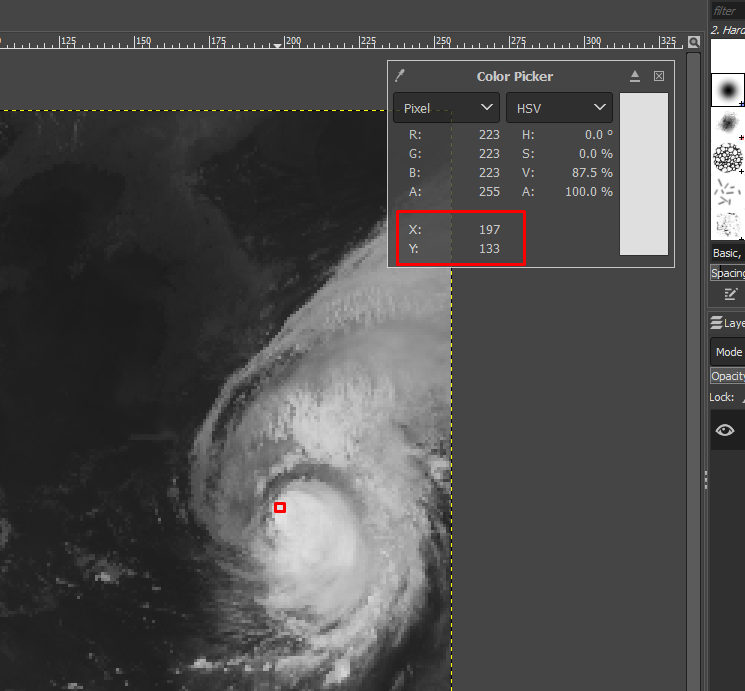

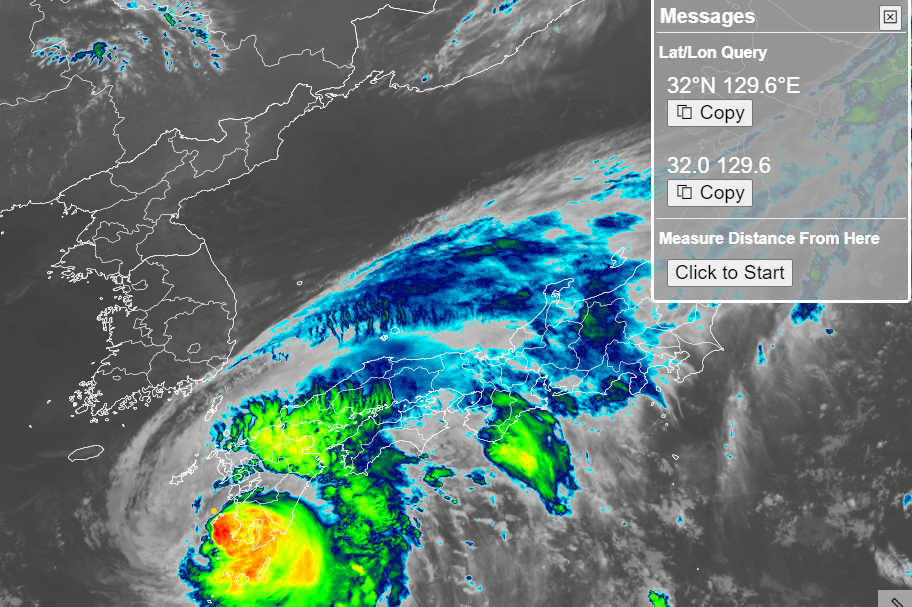